In [1]:
import os
import numpy as np
import time
from scipy.special import erfinv
from numpy import log, pi,sqrt, exp,cos,sin,tan,argpartition,copy,trapz,mean,cov,vstack,hstack
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import random
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import RSDmodel as RSD
k_ev = np.arange(0.0025, 0.495, 0.005)

Pz1 = [0.6777, 0.1274, 0.02226, 3.042, 1.762, 0.21, 21, -22.2, -0.19, -4.93]
Pz1_smear = [0.6777, 0.1274, 0.02226, 3.042, 1.762, 0.21, 21, -22.2, -0.19, -4.93, 0.8314707197]

Pz2 = [0.6632, 0.1204, 0.02233, 3.148, 2.37 , 1.4, -69, -13, 0.18, -3.35]
Pz2_smear = [0.6632, 0.1204, 0.02233, 3.148, 2.37 , 1.4, -69, -13, 0.18, -3.35, 2.554015795]
Pz3_smear = [0.6632, 0.1204, 0.02233, 3.148, 2.37 , 1.4, -69, -13, 0.18, -3.35, 5.960363582]


Pk_folps1 = RSD.FOLPSmultiples(Pz1, k_ev, 0.5)
Pk_folps1_smear = RSD.FOLPSmultipoles_smear(Pz1_smear, k_ev, 0.5)
ratio1_smear = [Pk_folps1_smear[1]/Pk_folps1[1], Pk_folps1_smear[2]/Pk_folps1[2]]

Pk_folps2 = RSD.FOLPSmultiples(Pz2, k_ev, 1.0)
Pk_folps2_smear = RSD.FOLPSmultipoles_smear(Pz2_smear, k_ev, 1.0)
ratio2_smear = [Pk_folps2_smear[1]/Pk_folps2[1], Pk_folps2_smear[2]/Pk_folps2[2]]

Pk_folps3_smear = RSD.FOLPSmultipoles_smear(Pz3_smear, k_ev, 1.0)
ratio3_smear =[Pk_folps3_smear[1]/Pk_folps2[1], Pk_folps3_smear[2]/Pk_folps2[2]]

plt.plot(k_ev, ratio1_smear[0], color = 'C0')
plt.plot(k_ev, ratio1_smear[1], color = 'C0', ls= '--')

plt.plot(k_ev, ratio2_smear[0], color = 'C1')
plt.plot(k_ev, ratio2_smear[1], color = 'C1', ls= '--')

plt.plot(k_ev, ratio3_smear[0], color = 'C2')
plt.plot(k_ev, ratio3_smear[1], color = 'C2', ls= '--')

plt.xlim([0,0.3])
plt.ylim([0.5,1.1])
# plt.plot(Pk_folps0[0], Pk_folps0[0]*Pk_folps0[1])

ratio_smear = [ratio1_smear, ratio2_smear, ratio3_smear]

N = 128 sampling points
M matrices have been computed


ValueError: not enough values to unpack (expected 8, got 6)

/Users/alain/Desktop/projectNU/main/data/fiducial/RSD_z0.5/pk/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/fiducial/LRG_z0.5/pk/fiducial_199_z0.5.pk
/Users/alain/Desktop/projectNU/main/data/fiducial/RSD_z1.0/pk/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/fiducial/LRG_z1.0/pk/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/fiducial/RSD_z1.0/pk/fiducial_199_z1.0.pk
/Users/alain/Desktop/projectNU/main/data/fiducial/QSO_z1.0/pk/fiducial_199_z1.0.pk


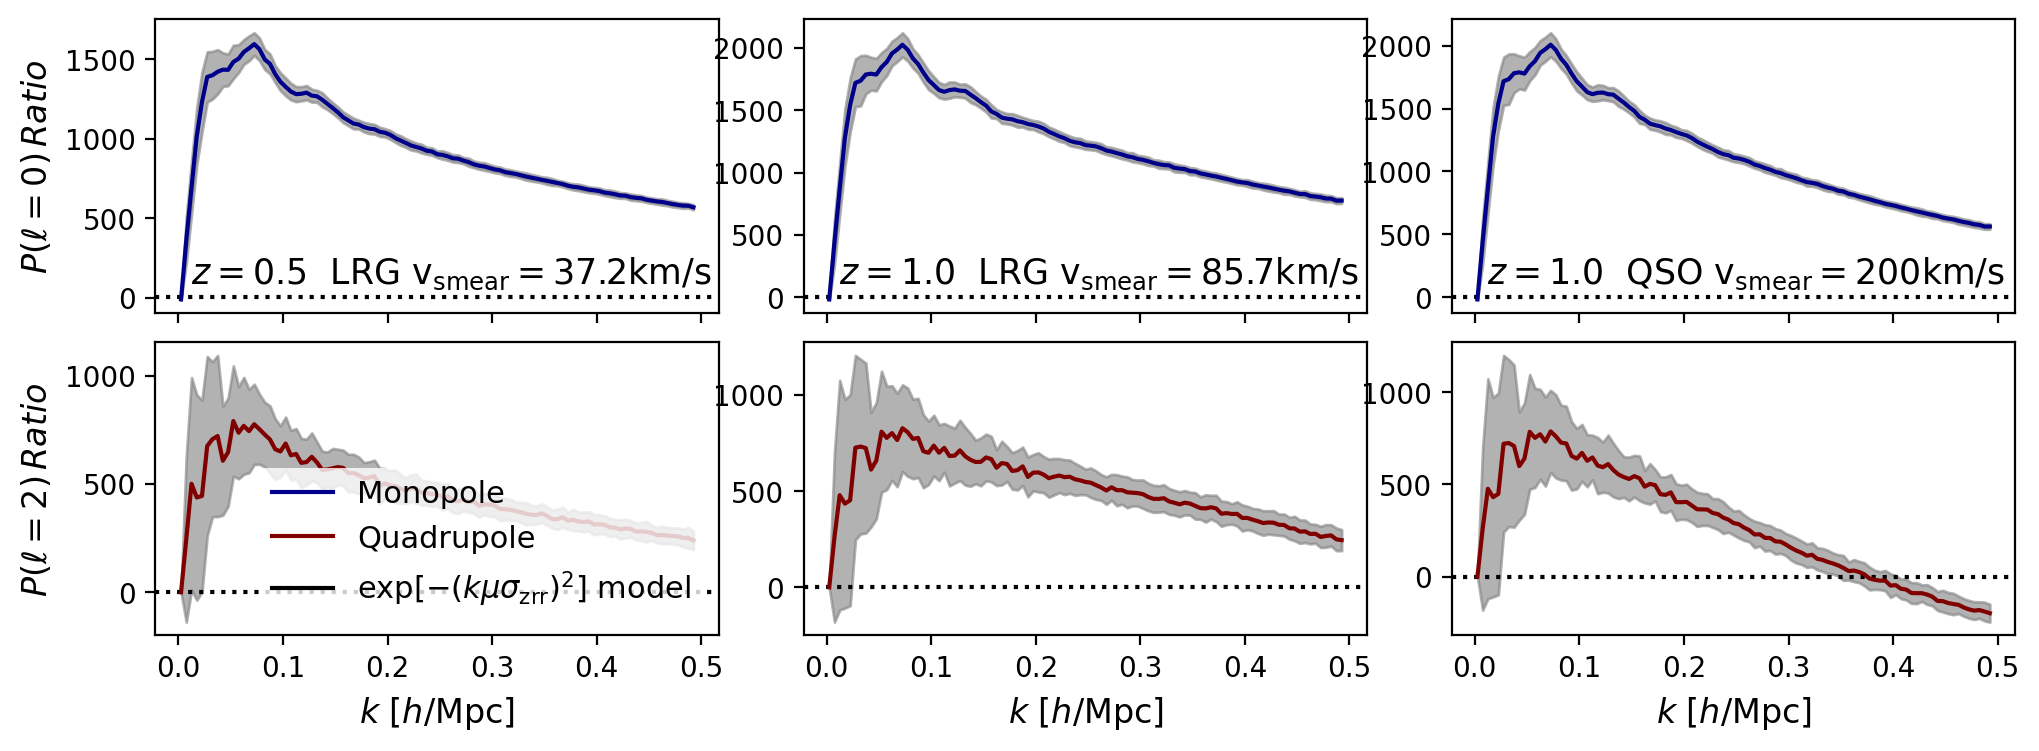

In [6]:
def dataload(data):
    Pk0 = [[],[]]
    Pk2 = [[],[]]
    k = data[0,:,1]
    l0 = data[:,:,3]
    l2 = data[:,:,4]
    Pk0[0] = np.mean(l0,axis=0)
    Pk0[1] = np.std(l0,axis=0)
    Pk2[0] = np.mean(l2,axis=0)
    Pk2[1] = np.std(l2,axis=0)
    pk_cov = np.append(l0,l2,axis=1)
    cov = np.cov(np.array(pk_cov).T)
    # icov = np.linalg.inv(cov)
    return (k,Pk0,Pk2, cov)

def Pkload(catalogue, r_pk, redshift):
    # load the QUIJOTE observation
    tool = 'Pypower' # Powspec, Pypower, NCV
    Ddir = f'/Users/alain/Desktop/projectNU/main/data/fiducial/{r_pk}_z{redshift}/pk'
    data = []
    nb = np.arange(100,200,1)
    for h in nb:
        realisation=np.loadtxt(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
        data.append(realisation)
    print(Ddir+f'/{catalogue}_{h}_z{redshift}.pk')
    (kev, pk0, pk2, icov) = dataload(np.array(data))
    pkl = [kev, pk0, pk2, icov]
    return pkl

label_fontsize = 12
legend_fontsize = 12.5
systematic_map  = {
    'RSD': 'fiducial',
    'LRG': '+LRG vsmear',
    'QSO': '+QSO vsmear',
    '1%CATAS': '+1%vcatas',
    '5%CATAS': '+5%vcatas'
    }
fig, axs = plt.subplots(2, 3, sharex=True, sharey=False, figsize = (12, 4))
fig.subplots_adjust(wspace=0.15)
fig.subplots_adjust(hspace=0.1)

colors = ['darkblue', 'maroon']
lss = ['-', '--']

for d in range(2):
    Pkobs = []
    labels = []
    for t,r_pk in enumerate(r_pks):
        systematic = systematic_map.get(r_pk, '')
        [k_ev, pk0, pk2, cov] = Pkload('fiducial', r_pk, z_pk)
        Pkobs.append([pk0, pk2])
        labels.append(f'obs {systematic}')
        if t == 0:
            rsf = 5
            klen = len(k_ev)
            ref =  [i[0] for i in [pk0, pk2]] 
            errbar = [i[1] for i in [pk0, pk2]]

    for ell, i in zip(['monopole','quadrupole'],range(2)):

        axs[i][d].plot(k_ev, k_ev*(Pkobs[1][i][0]), color = colors[i], linestyle=lss[t-1])
        axs[i][d].fill_between(k_ev,  k_ev*(Pkobs[t][i][0]-Pkobs[t][i][1]),
                            k_ev*(Pkobs[1][i][0]+Pkobs[1][i][1]), alpha=0.6, color='grey') 
        # axs[i][d].plot(k_ev, ratio_smear[d][i], color = 'black') 
        axs[1][d].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]', fontsize = label_fontsize)
        axs[i][0].set_ylabel(r'$P(\ell = {}) \, Ratio$'.format(i*2), fontsize = label_fontsize)

line1= Line2D([0], [0], label='Monopole', color='darkblue', linestyle= '-')
line2 = Line2D([0], [0], label='Quadrupole', color='maroon', linestyle= '-')
line3 = Line2D([0], [0], label=r'$\exp[-(k\mu\sigma_{\rm{zrr}})^2] \ \rm{model}$', color='black', linestyle= '-')

leg1 = axs[1][0].legend(handles=[line1,line2, line3], loc=4, fontsize=11)
leg1.get_frame().set_linewidth(0.0)

plt.figtext(0.14, 0.55, r'$z=0.5 \ \ \rm{LRG} \  v_{smear} =  37.2 \rm{km/s}$', fontsize=legend_fontsize)
plt.figtext(0.41, 0.55, r'$z=1.0 \ \ \rm{LRG} \  v_{smear} =  85.7 \rm{km/s}$', fontsize=legend_fontsize)
plt.figtext(0.68, 0.55, r'$z=1.0 \ \ \rm{QSO} \ v_{smear} =  200 \rm{km/s}$', fontsize=legend_fontsize)
plt.show()